In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Memuat dataset yang akan digunakan
df = pd.read_csv('zomato.csv')

In [3]:
# Melihat beberapa baris pertama data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# Menampilkan deskripsi statistik dataset
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
# Mengecek nilai null pada dataset
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# Menghapus missing values di kolom yang krusial untuk analisis
def handle_missing_values(df):
    # Mengisi missing values di kolom yang bisa diimputasi
    df['rate'] = df['rate'].fillna('0/5')  # Mengisi rate yang kosong dengan default '0/5'
    df['votes'] = df['votes'].fillna(0)  # Mengisi votes dengan 0
    df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna('0')

    # Menghapus baris dengan banyak missing values di kolom yang tidak dapat diimputasi
    df.dropna(subset=['menu_item', 'dish_liked', 'cuisines', 'location', 'rest_type'], inplace=True)

handle_missing_values(df)

In [8]:
# Mengubah tipe data kolom yang tidak sesuai
def convert_data_types(df):
    # Kolom rate: Menghapus '/5' dan mengubah ke float
    df['rate'] = df['rate'].apply(lambda x: float(str(x).split('/')[0]) if '/' in str(x) else np.nan)

    # Kolom votes: Mengubah ke integer
    df['votes'] = df['votes'].astype(int)

    # Kolom approx_cost(for two people): Menghapus tanda koma dan mengubah ke integer
    df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: int(str(x).replace(',', '')))

convert_data_types(df)

In [9]:
# Membersihkan kolom `menu_item` dari tanda kurung, tanda petik, dan simbol lainnya
def clean_menu_items(df):
    df['menu_item'] = df['menu_item'].apply(lambda x: ', '.join(re.sub(r"[\[\]'\"]", '', str(x)).split(', ')) if x != '[]' else np.nan)

clean_menu_items(df)

# 4. Menghapus duplikat jika ada
def remove_duplicates(df):
    df.drop_duplicates(inplace=True)

remove_duplicates(df)

In [10]:
# Merapikan kolom untuk memastikan dataset rapi
def tidy_up_columns(df):
    # Menghapus spasi di nama kolom
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

    # Mengganti nama kolom agar lebih jelas
    df.rename(columns={
        'approx_cost(for_two_people)': 'approx_cost',
        'listed_in(type)': 'category_type',
        'listed_in(city)': 'city'
    }, inplace=True)

tidy_up_columns(df)

In [11]:
# Menangani missing values setelah transformasi
def final_missing_value_treatment(df):
    # Mengisi kembali kolom yang kosong dengan default value atau 'Unknown'
    df['menu_item'].fillna('Not Available', inplace=True)
    df['dish_liked'].fillna('Not Specified', inplace=True)
    df['cuisines'].fillna('Unknown', inplace=True)
    df['location'].fillna('Unknown', inplace=True)
    df['rest_type'].fillna('Unknown', inplace=True)

    # Mengisi missing value pada kolom rate dengan rata-rata rate
    df['rate'].fillna(df['rate'].mean(), inplace=True)

    # Mengisi missing value pada kolom phone dengan 'Not Available'
    df['phone'].fillna('Not Available', inplace=True)

final_missing_value_treatment(df)

C:\Users\divra\AppData\Local\Temp\ipykernel_12368\3273776803.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['menu_item'].fillna('Not Available', inplace=True)
C:\Users\divra\AppData\Local\Temp\ipykernel_12368\3273776803.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [12]:
# Membersihkan review dari angka dan karakter tidak relevan
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya menyisakan huruf dan spasi
    text = re.sub(r'\s+', ' ', text)  # Mengganti spasi ganda dengan spasi tunggal
    return text.strip().lower()  # Menghapus spasi di awal/akhir dan mengubah ke huruf kecil

df['clean_reviews'] = df['reviews_list'].astype(str).apply(clean_text)

In [13]:
# Membersihkan kolom rate
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [14]:
# Mengatur tema visualisasi
def set_visual_theme():
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.rcParams.update({
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10
    })
set_visual_theme()

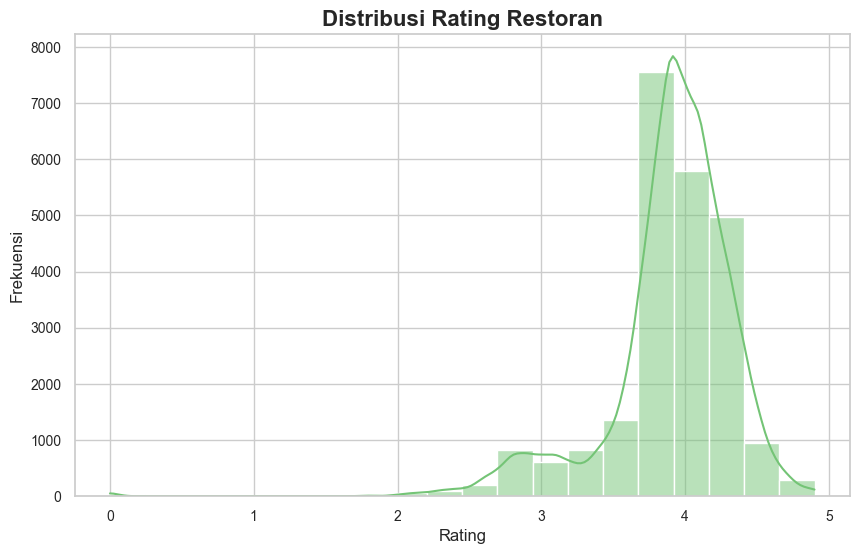

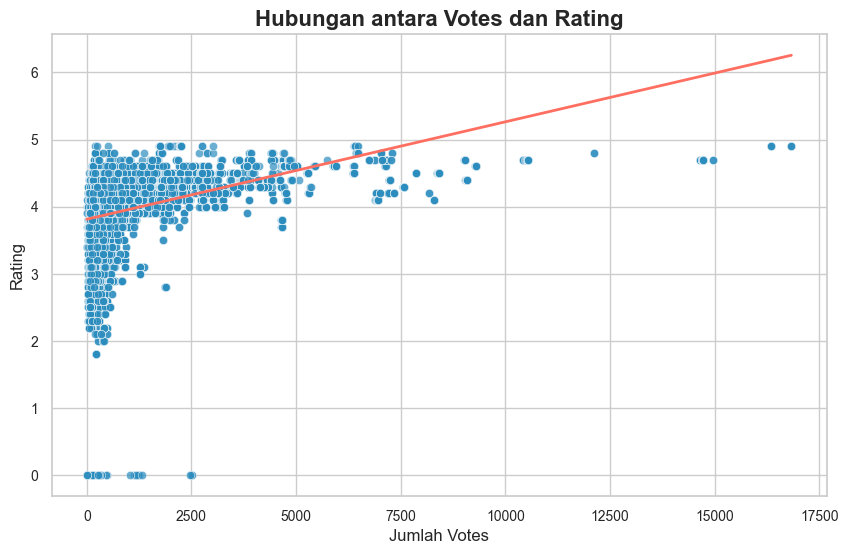

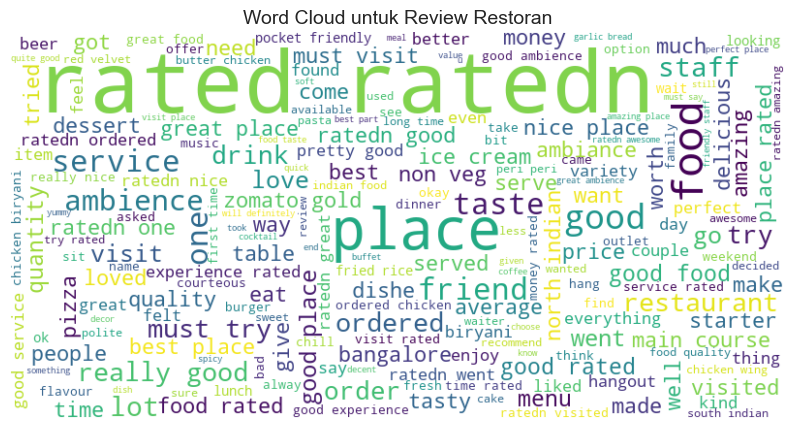

In [15]:
# 1. Analisis Rating dan Review

def analyze_rating_and_review(df):
    # Distribusi rating
    plt.figure(figsize=(10, 6))
    sns.histplot(df['rate'], bins=20, kde=True, color='#74C476')  # Warna hijau pastel
    plt.title('Distribusi Rating Restoran', fontsize=16, fontweight='bold')
    plt.xlabel('Rating')
    plt.ylabel('Frekuensi')
    plt.show()

    # Hubungan antara jumlah votes dan rating
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='votes', y='rate', data=df, alpha=0.7, color='#2B8CBE')  # Warna biru pastel
    sns.regplot(x='votes', y='rate', data=df, scatter=False, color='#FF6F61', ci=None, line_kws={'linewidth': 2})  # Garis tren merah pastel
    plt.title('Hubungan antara Votes dan Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Votes')
    plt.ylabel('Rating')
    plt.show()

    # Membuat Word Cloud
    reviews_text = ' '.join(df['clean_reviews'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud untuk Review Restoran', fontsize=14)
    plt.show()

analyze_rating_and_review(df)

Analisa Rating dan Review
- Distribusi rating menunjukkan bahwa sebagian besar restoran memiliki rating yang berkisar di atas rata-rata (sekitar 3 hingga 4.5). Hal ini menunjukkan kualitas layanan restoran cukup baik secara umum.
- Hubungan antara jumlah votes dan rating menunjukkan korelasi positif lemah. Restoran dengan jumlah votes yang tinggi cenderung memiliki rating yang baik.
- Word cloud dari review restoran memperlihatkan kata-kata yang paling sering muncul dalam ulasan, memberikan gambaran tentang aspek yang paling dihargai atau dikeluhkan oleh pelanggan.


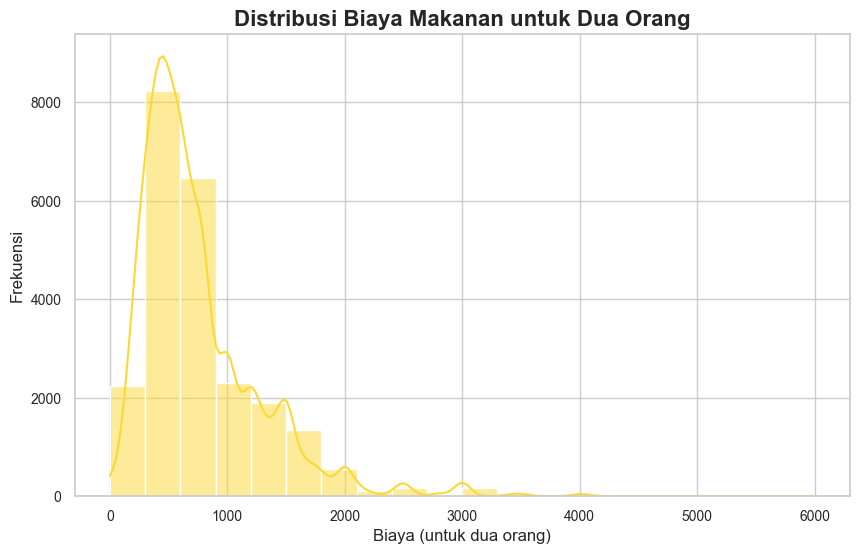

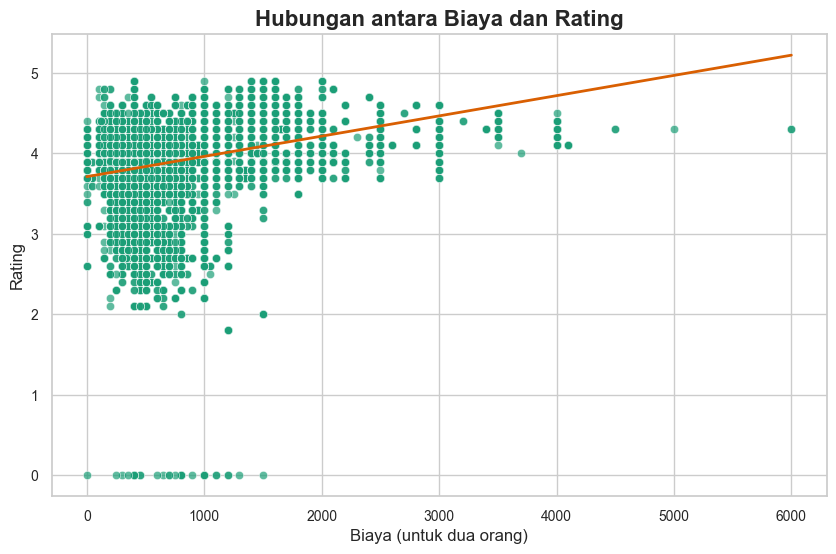

In [16]:
# 2. Analisis Harga dan Biaya Makanan

def analyze_cost_and_food(df):
    # Distribusi biaya makanan untuk dua orang
    plt.figure(figsize=(10, 6))
    sns.histplot(df['approx_cost'], bins=20, kde=True, color='#FDD835')  # Warna kuning pastel
    plt.title('Distribusi Biaya Makanan untuk Dua Orang', fontsize=16, fontweight='bold')
    plt.xlabel('Biaya (untuk dua orang)')
    plt.ylabel('Frekuensi')
    plt.show()

    # Hubungan antara biaya makanan dan rating
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='approx_cost', y='rate', data=df, alpha=0.7, color='#1B9E77')  # Warna hijau tua pastel
    sns.regplot(x='approx_cost', y='rate', data=df, scatter=False, color='#D95F02', ci=None, line_kws={'linewidth': 2})  # Garis tren oranye pastel
    plt.title('Hubungan antara Biaya dan Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Biaya (untuk dua orang)')
    plt.ylabel('Rating')
    plt.show()

analyze_cost_and_food(df)

Analisis Harga dan Biaya Makanan
- Distribusi biaya makanan untuk dua orang cenderung berkisar pada kisaran harga menengah, dengan sebagian besar restoran menawarkan harga antara 200 hingga 800 (dalam mata uang dataset).
- Hubungan antara biaya makanan dan rating menunjukkan bahwa restoran dengan harga lebih tinggi cenderung memiliki rating yang lebih baik, meskipun data juga menunjukkan beberapa outlier.

C:\Users\divra\AppData\Local\Temp\ipykernel_12368\1218578259.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette='viridis')  # Warna gradasi hijau-biru


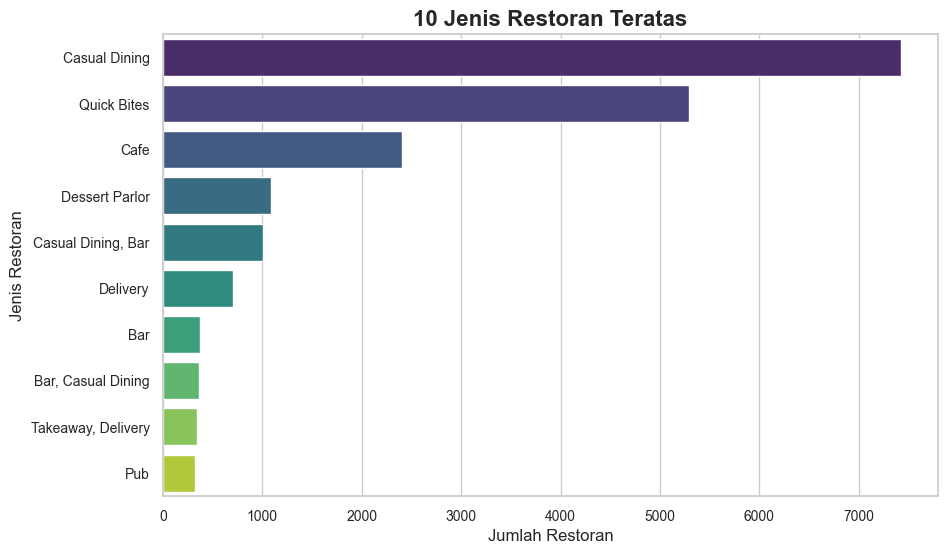

C:\Users\divra\AppData\Local\Temp\ipykernel_12368\1218578259.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma')  # Warna gradasi merah-oranye


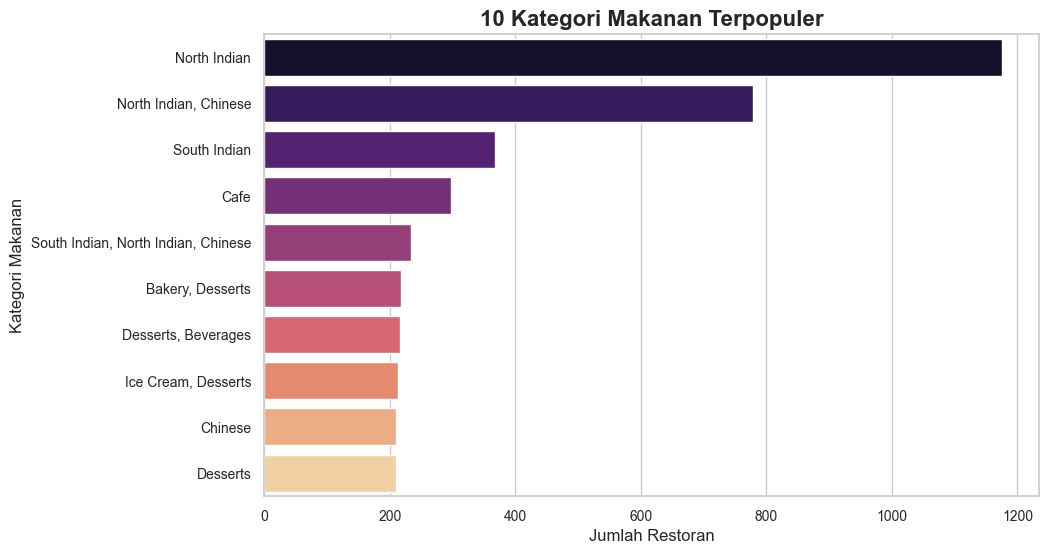

In [17]:
# 3. Analisis Jenis Restoran dan Kategori Makanan

def analyze_restaurant_and_category(df):
    # Restoran paling umum berdasarkan jenis
    plt.figure(figsize=(10, 6))
    top_rest_types = df['rest_type'].value_counts().head(10)
    sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette='viridis')  # Warna gradasi hijau-biru
    plt.title('10 Jenis Restoran Teratas', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Restoran')
    plt.ylabel('Jenis Restoran')
    plt.show()

    # Kategori makanan terpopuler
    plt.figure(figsize=(10, 6))
    top_cuisines = df['cuisines'].value_counts().head(10)
    sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma')  # Warna gradasi merah-oranye
    plt.title('10 Kategori Makanan Terpopuler', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Restoran')
    plt.ylabel('Kategori Makanan')
    plt.show()

analyze_restaurant_and_category(df)

Analisis Jenis Restoran dan Kategori Makanan
- Jenis restoran paling umum mencakup format casual dining dan quick bites, menunjukkan bahwa pelanggan lebih sering mengunjungi restoran dengan gaya yang santai.
- Kategori makanan terpopuler meliputi masakan India, Italia, dan makanan cepat saji. Hal ini menunjukkan preferensi pelanggan terhadap masakan tradisional serta internasional.

C:\Users\divra\AppData\Local\Temp\ipykernel_12368\1378474125.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='cividis')  # Warna gradasi biru-kuning


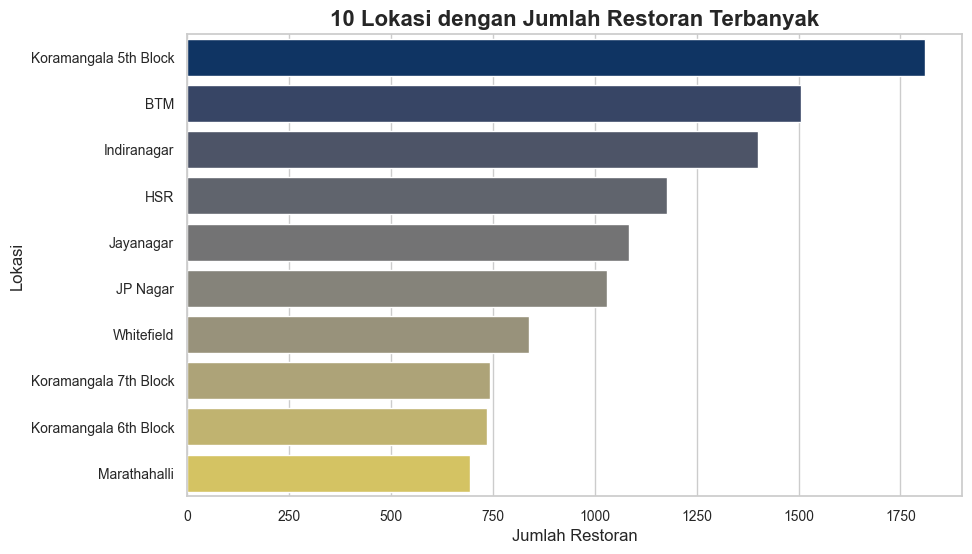

C:\Users\divra\AppData\Local\Temp\ipykernel_12368\1378474125.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_locations.values, y=popular_locations.index, palette='plasma')  # Warna gradasi ungu-kuning


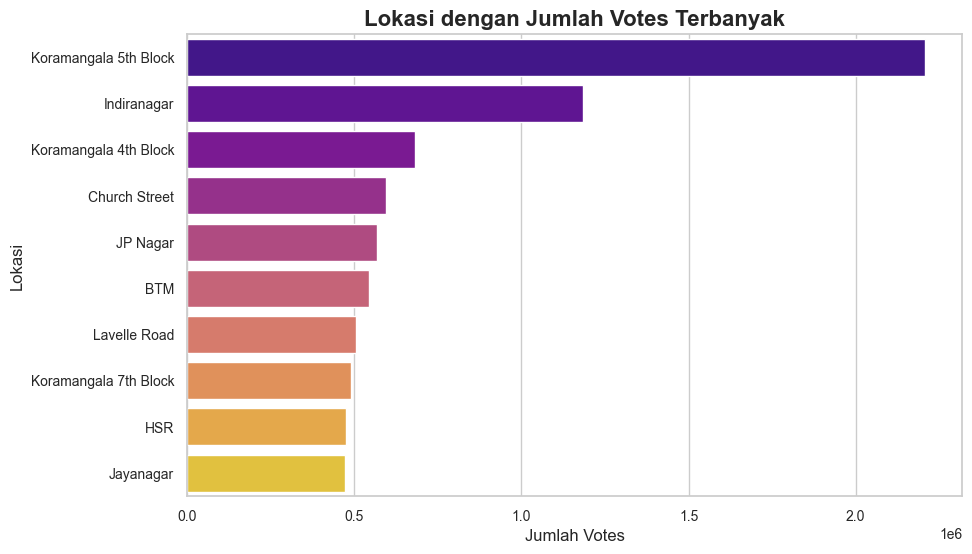

In [18]:
# 4. Analisis Lokasi dan Popularitas Restoran

def analyze_location_and_popularity(df):
    # Lokasi dengan jumlah restoran terbanyak
    plt.figure(figsize=(10, 6))
    top_locations = df['location'].value_counts().head(10)
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='cividis')  # Warna gradasi biru-kuning
    plt.title('10 Lokasi dengan Jumlah Restoran Terbanyak', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Restoran')
    plt.ylabel('Lokasi')
    plt.show()

    # Popularitas restoran berdasarkan lokasi (votes)
    popular_locations = df.groupby('location')['votes'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=popular_locations.values, y=popular_locations.index, palette='plasma')  # Warna gradasi ungu-kuning
    plt.title('Lokasi dengan Jumlah Votes Terbanyak', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Votes')
    plt.ylabel('Lokasi')
    plt.show()

analyze_location_and_popularity(df)

Analisis Lokasi dan Popularitas Restoran
- Lokasi dengan jumlah restoran terbanyak berpusat di daerah-daerah metropolitan, menunjukkan konsentrasi restoran di daerah dengan aktivitas ekonomi yang tinggi.
- Popularitas berdasarkan lokasi (jumlah votes) menunjukkan bahwa beberapa lokasi tertentu memiliki restoran yang sangat diminati, baik karena jumlah restoran yang tinggi atau daya tarik restoran di area tersebut.

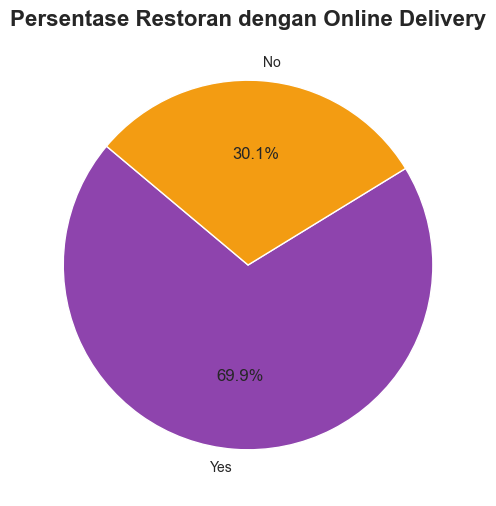

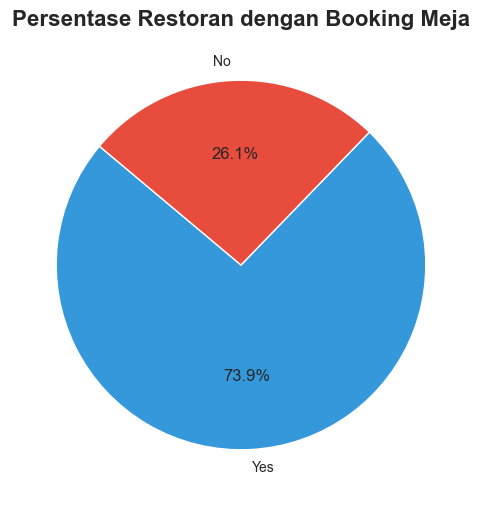

In [19]:
# 5. Analisis Online Delivery dan Booking

def analyze_online_delivery_and_booking(df):
    # Persentase restoran yang menawarkan online delivery
    online_delivery = df['online_order'].value_counts()
    plt.figure(figsize=(6, 6))
    online_delivery.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#8E44AD', '#F39C12'], labels=['Yes', 'No'], wedgeprops={'edgecolor': 'white'})  # Ungu & Oranye
    plt.title('Persentase Restoran dengan Online Delivery', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.show()

    # Persentase restoran yang menawarkan booking meja
    booking = df['book_table'].value_counts()
    plt.figure(figsize=(6, 6))
    booking.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#3498DB', '#E74C3C'], labels=['Yes', 'No'], wedgeprops={'edgecolor': 'white'})  # Biru & Merah
    plt.title('Persentase Restoran dengan Booking Meja', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.show()

analyze_online_delivery_and_booking(df)

Analisis Online Delivery dan Booking
- Sebagian besar restoran menawarkan layanan online delivery, mencerminkan peningkatan preferensi pelanggan terhadap layanan yang nyaman.
- Persentase restoran yang menawarkan booking meja relatif lebih kecil dibandingkan online delivery, menunjukkan bahwa pelanggan cenderung lebih memilih fleksibilitas dibandingkan reservasi meja.